<a href="https://colab.research.google.com/github/maliozdemir1/dsa210-project-impact-of-climate-on-gastronomic-diversity/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

foods = pd.read_csv("manual_clean_en.csv", encoding="utf-8-sig")
clim  = pd.read_csv("iklim_mgm_1991_2020.csv", encoding="utf-8-sig")

print("Foods shape:", foods.shape)
print("Climate shape:", clim.shape)

display(foods.head(5))
display(clim.head(5))


Foods shape: (1530, 5)
Climate shape: (79, 28)


,province,food_name,product_group_tr,product_group_en,kcal_100g
0,Adana,Adana Halka Tatlısı,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",320
1,Adana,Adana Karakuş Tatlısı,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",294
2,Adana,Adana Kol Böreği,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",226
3,Adana,Adana Taş Kadayıfı,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",361
4,Sakarya,Adapazarı Kabak Tatlısı,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",290


,province,m_param,temp_annual_mean,prec_annual_total,temp_m01,temp_m02,temp_m03,temp_m04,temp_m05,temp_m06,...,prec_m03,prec_m04,prec_m05,prec_m06,prec_m07,prec_m08,prec_m09,prec_m10,prec_m11,prec_m12
0,Adana,ADANA,19.458333,680.8,9.5,10.7,13.9,17.7,22.1,25.9,...,59.2,51.2,48.2,20.3,12.3,10.4,25.1,39.7,78.4,143.0
1,Adıyaman,ADIYAMAN,17.683333,729.5,5.0,6.2,10.4,15.3,20.9,27.1,...,87.3,61.7,45.2,9.4,1.9,2.5,9.2,48.6,74.1,142.0
2,Afyonkarahisar,AFYONKARAHISAR,11.691667,451.4,0.4,2.2,6.0,10.5,15.3,19.4,...,44.6,47.0,50.1,41.5,21.8,18.0,23.6,40.3,32.4,46.8
3,Aksaray,AKSARAY,12.775000,349.4,0.9,2.6,7.1,11.9,16.7,21.0,...,39.7,40.4,43.1,24.7,8.2,6.2,12.4,25.9,30.1,44.8
4,Amasya,AMASYA,13.791667,469.2,2.8,4.6,8.5,13.3,17.8,21.6,...,50.2,51.9,61.3,41.0,12.9,12.9,21.3,36.4,44.6,53.8


Firstly, we have controlled and show the outputs of the files that we are going to use from determining climate and calorie correlation.

In [ ]:
def normalize_province(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().upper()
    tr_map = str.maketrans({"İ":"I","I":"I","ı":"I","Ş":"S","Ğ":"G","Ü":"U","Ö":"O","Ç":"C"})
    s = s.translate(tr_map)
    s = re.sub(r"[^A-Z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s.replace(" ", "")

foods["prov_key"] = foods["province"].apply(normalize_province)
clim["prov_key"]  = clim["province"].apply(normalize_province)

print("Unique provinces (foods):", foods["prov_key"].nunique())
print("Unique provinces (climate):", clim["prov_key"].nunique())


Unique provinces (foods): 83
Unique provinces (climate): 79


At this part, we have fixed the name of the provinces in terms of Turkish characters. Also, we need to fit the provinces with keys in order to prevent mismatching due to their names.

In [ ]:
foods_prov = (foods.groupby(["prov_key","province"], dropna=False)
              .agg(n_foods=("food_name","size"),
                   mean_kcal=("kcal_100g","mean"),
                   median_kcal=("kcal_100g","median"),
                   std_kcal=("kcal_100g","std"))
              .reset_index())

merged = foods_prov.merge(
    clim[["prov_key","temp_annual_mean","prec_annual_total"]],
    on="prov_key",
    how="inner"
)

print("Merged provinces:", merged.shape[0])
display(merged.head(5))


Merged provinces: 79


,prov_key,province,n_foods,mean_kcal,median_kcal,std_kcal,temp_annual_mean,prec_annual_total
0,ADANA,Adana,20,224.400000,227.5,212.563402,19.458333,680.8
1,ADIYAMAN,Adıyaman,7,216.857143,171.0,207.880117,17.683333,729.5
2,AFYONKARAHISAR,Afyonkarahisar,47,239.808511,241.0,122.455429,11.691667,451.4
3,AGRI,Ağrı,6,283.500000,276.5,61.282134,6.691667,512.9
4,AKSARAY,Aksaray,11,308.000000,277.0,139.529208,12.775000,349.4


After we have fixed the disorders and mismatches, we need to evaluate the number of foods, their calories, medians, climate and precipitation of the areas in scale of cities. Then, we are going to use exploratory data analysis techniques and graphs in order to visualize the correlation between our datas.

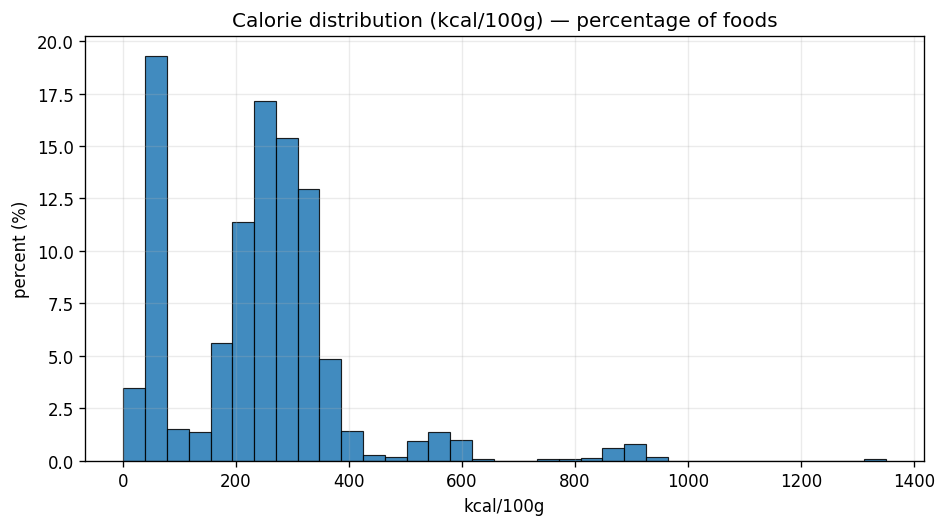

In [ ]:
import matplotlib.pyplot as plt

x = foods["kcal_100g"].dropna()

plt.figure(figsize=(8,4.5), dpi=120)
plt.hist(x, bins=35, weights=[100/len(x)]*len(x), edgecolor="black", linewidth=0.7, alpha=0.85)
plt.title("Calorie distribution (kcal/100g) — percentage of foods")
plt.xlabel("kcal/100g")
plt.ylabel("percent (%)")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


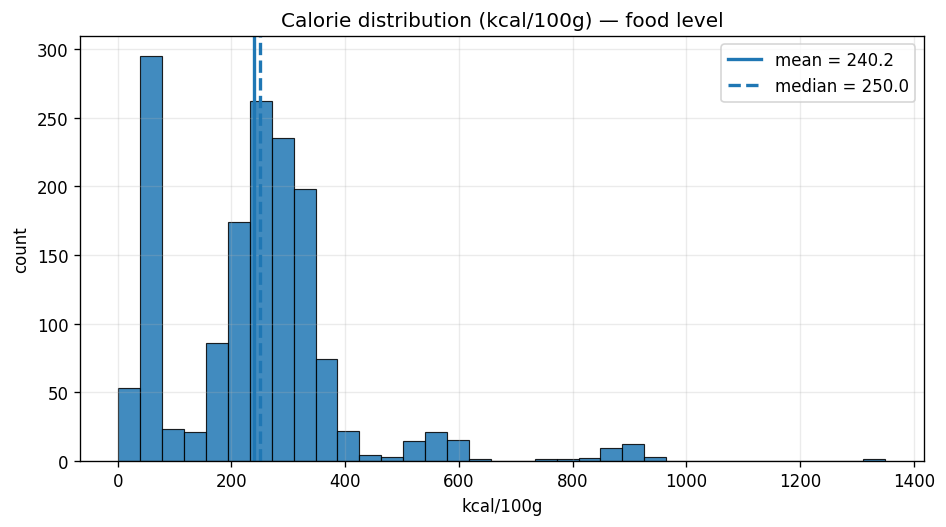

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = foods["kcal_100g"].dropna()
mean_v, med_v = x.mean(), x.median()

plt.figure(figsize=(8,4.5), dpi=120)
plt.hist(x, bins=35, edgecolor="black", linewidth=0.7, alpha=0.85)
plt.axvline(mean_v, linewidth=2, label=f"mean = {mean_v:.1f}")
plt.axvline(med_v, linewidth=2, linestyle="--", label=f"median = {med_v:.1f}")
plt.title("Calorie distribution (kcal/100g) — food level")
plt.xlabel("kcal/100g")
plt.ylabel("count")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


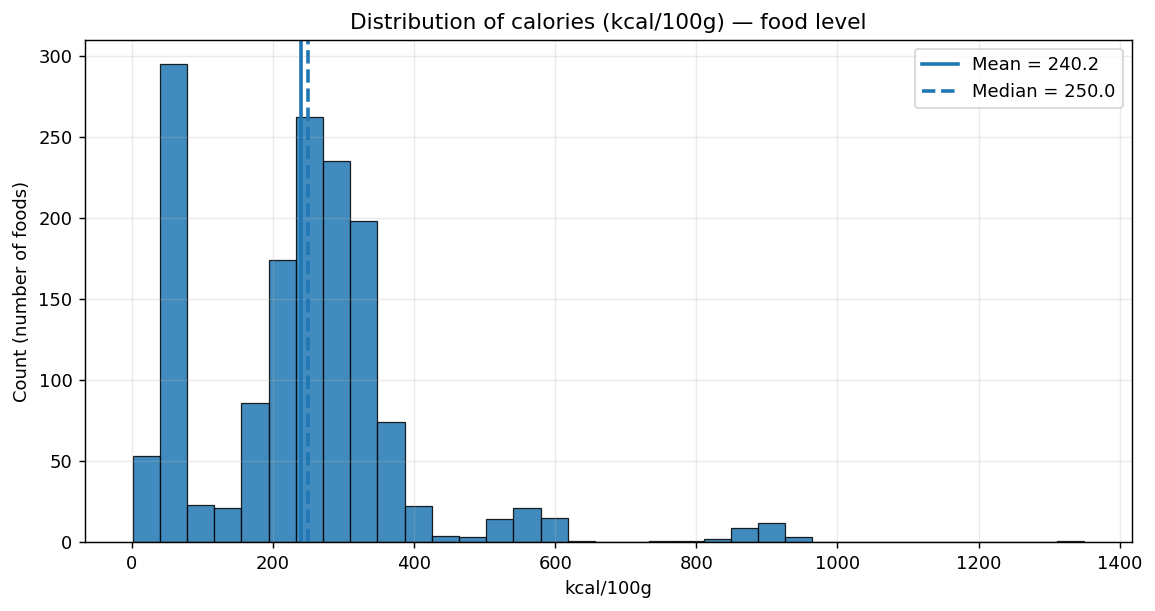

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = foods["kcal_100g"].dropna()

plt.figure(figsize=(9,4.8), dpi=130)

# histogram (COUNT)
plt.hist(x, bins=35, edgecolor="black", linewidth=0.7, alpha=0.85)

# mean & median lines (nice touch)
mean_v = x.mean()
med_v  = x.median()
plt.axvline(mean_v, linewidth=2, label=f"Mean = {mean_v:.1f}")
plt.axvline(med_v, linewidth=2, linestyle="--", label=f"Median = {med_v:.1f}")

plt.title("Distribution of calories (kcal/100g) — food level")
plt.xlabel("kcal/100g")
plt.ylabel("Count (number of foods)")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


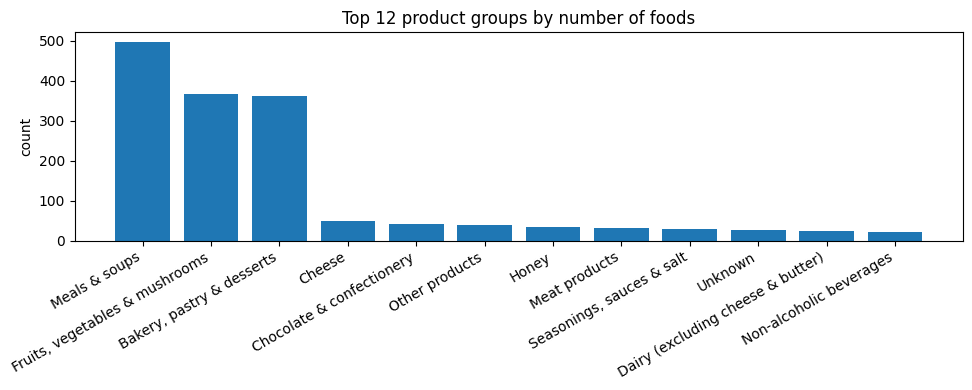

In [ ]:
counts = foods["product_group_en"].value_counts().head(12)

plt.figure(figsize=(10,4))
plt.bar(counts.index, counts.values)
plt.title("Top 12 product groups by number of foods")
plt.ylabel("count")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


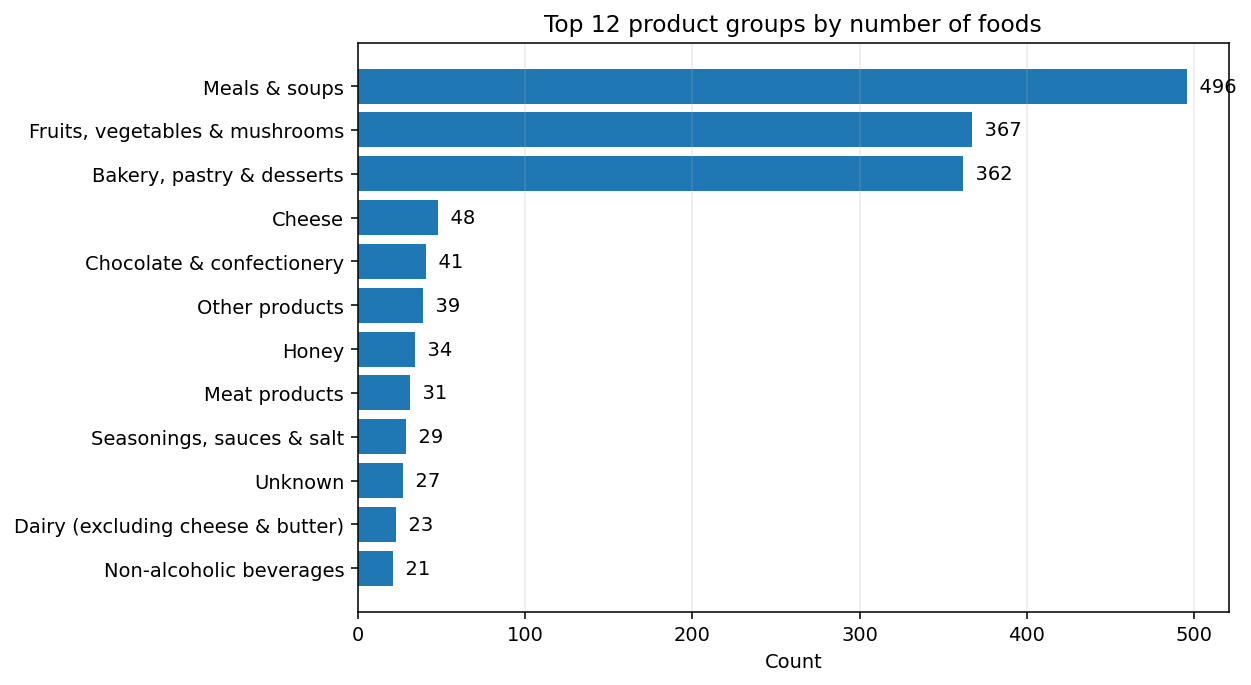

In [ ]:
import matplotlib.pyplot as plt

counts = foods["product_group_en"].value_counts().head(12).sort_values()

plt.figure(figsize=(9,5), dpi=140)
plt.barh(counts.index, counts.values)
plt.title("Top 12 product groups by number of foods")
plt.xlabel("Count")
plt.grid(axis="x", alpha=0.25)

for i, v in enumerate(counts.values):
    plt.text(v, i, f"  {v}", va="center")   # label at end of bars

plt.tight_layout()
plt.show()


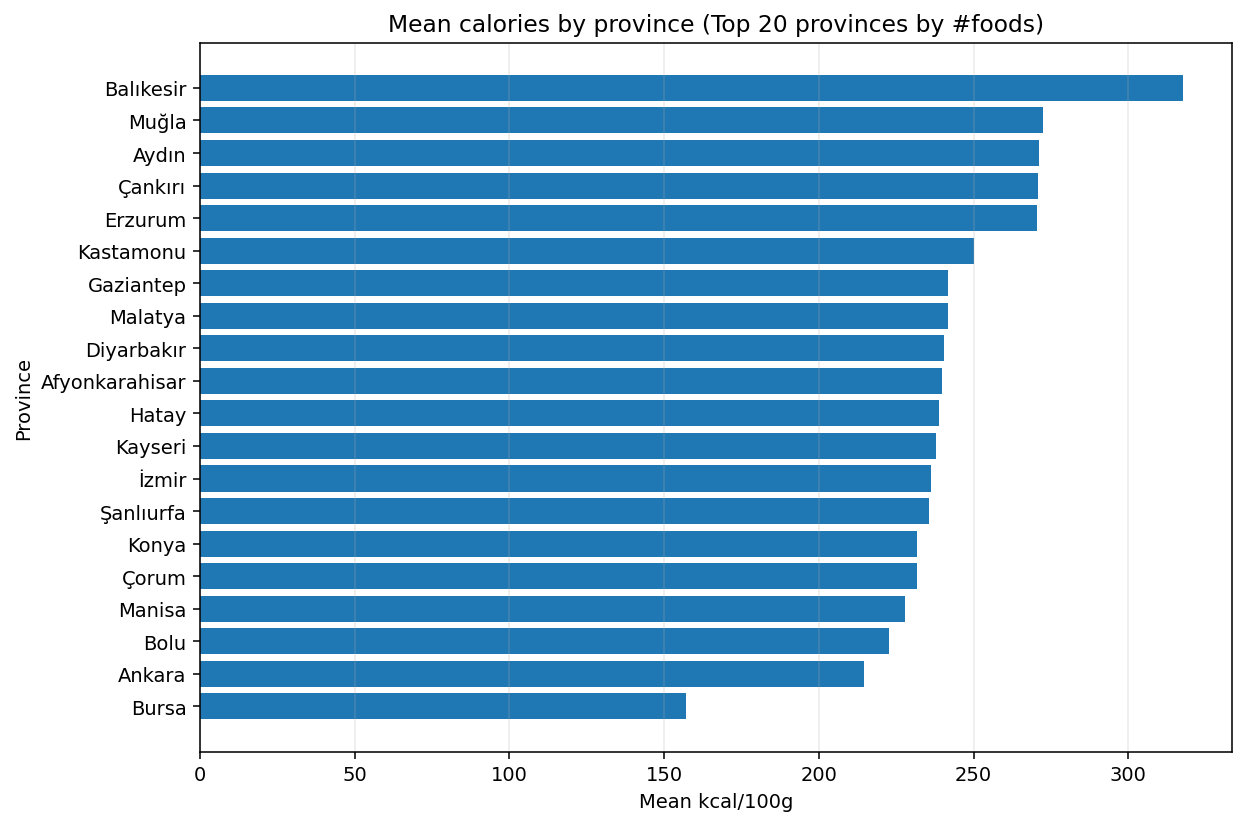

In [ ]:
import matplotlib.pyplot as plt

prov_stats = (foods.groupby("province")
              .agg(n_foods=("food_name","size"),
                   mean_kcal=("kcal_100g","mean"))
              .reset_index())

topN = 20
plot_df = prov_stats.sort_values("n_foods", ascending=False).head(topN).sort_values("mean_kcal")

plt.figure(figsize=(9,6), dpi=140)
plt.barh(plot_df["province"], plot_df["mean_kcal"])
plt.title(f"Mean calories by province (Top {topN} provinces by #foods)")
plt.xlabel("Mean kcal/100g")
plt.ylabel("Province")
plt.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()


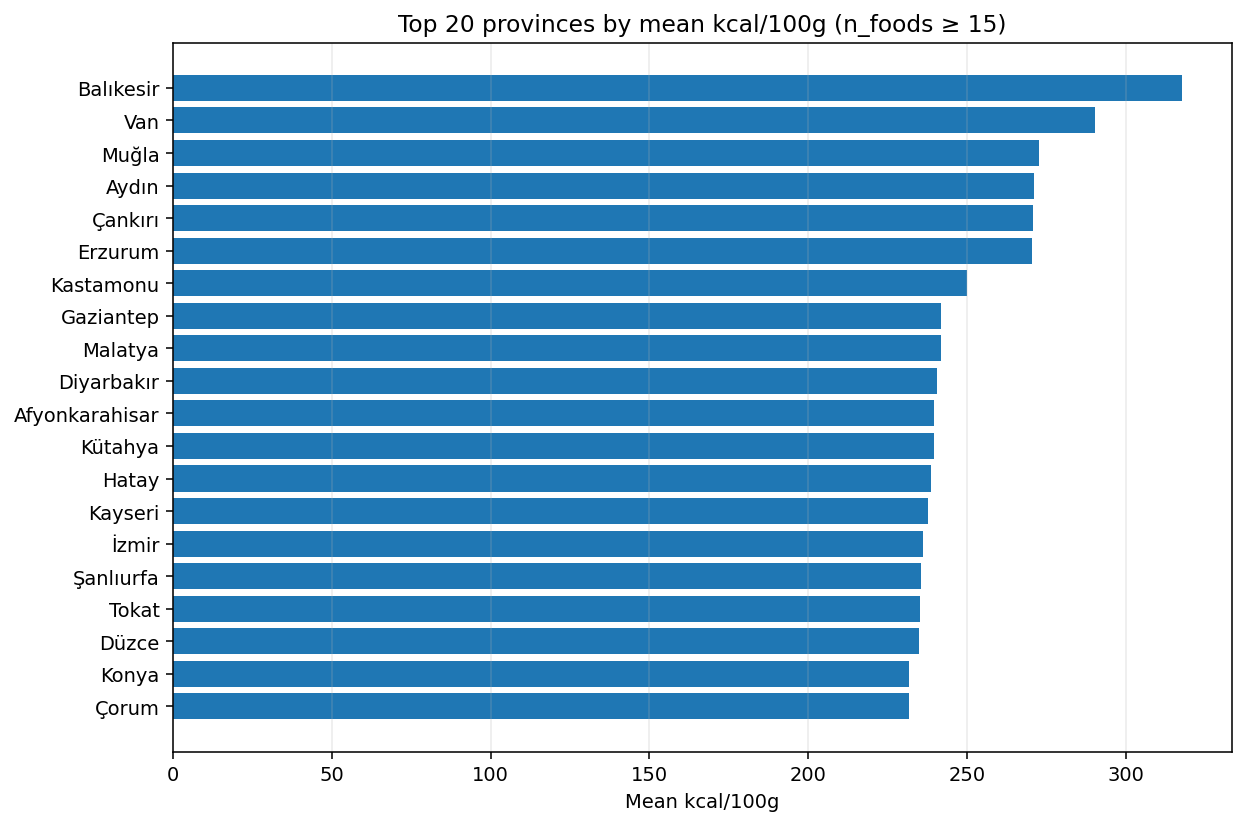

In [15]:
import matplotlib.pyplot as plt

min_n = 15
prov_stats = (foods.groupby("province")
              .agg(n_foods=("food_name","size"),
                   mean_kcal=("kcal_100g","mean"))
              .reset_index())

filtered = prov_stats[prov_stats["n_foods"] >= min_n].sort_values("mean_kcal").tail(20)

plt.figure(figsize=(9,6), dpi=140)
plt.barh(filtered["province"], filtered["mean_kcal"])
plt.title(f"Top 20 provinces by mean kcal/100g (n_foods ≥ {min_n})")
plt.xlabel("Mean kcal/100g")
plt.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()


/tmp/ipython-input-502052188.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(cats))   # generates len(cats) distinct colors


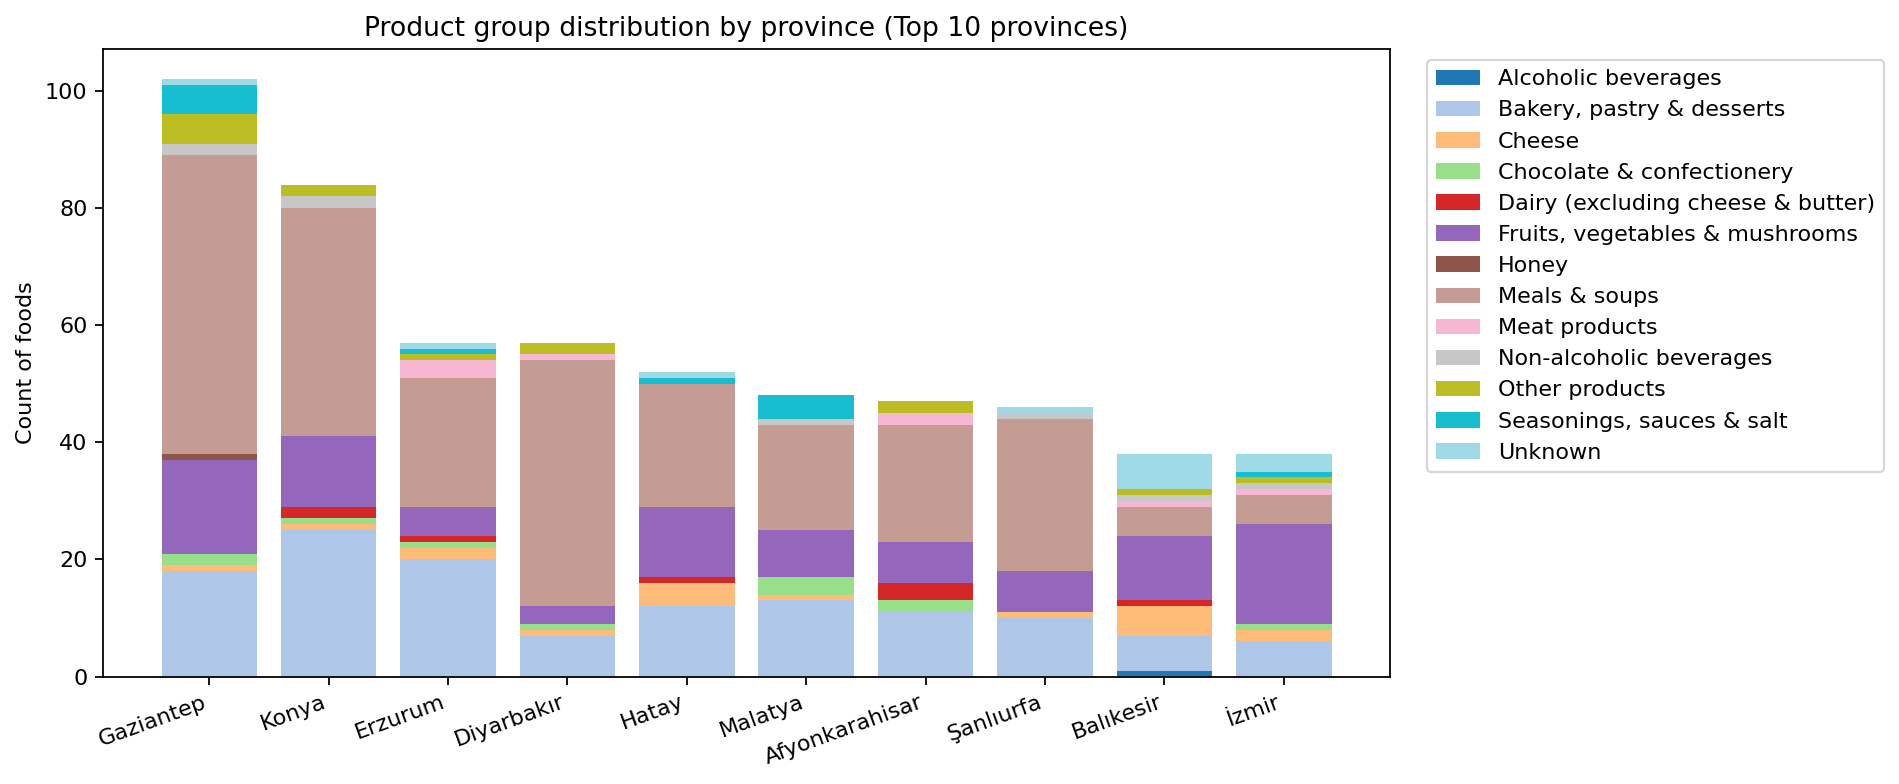

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

top_prov = foods["province"].value_counts().head(10).index.tolist()
sub = foods[foods["province"].isin(top_prov)].copy()

pivot = (sub.pivot_table(index="province",
                         columns="product_group_en",
                         values="food_name",
                         aggfunc="count",
                         fill_value=0))

# order provinces by total
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

# --- NEW: assign distinct colors (no repetition) ---
cats = list(pivot.columns)
cmap = cm.get_cmap("tab20", len(cats))   # generates len(cats) distinct colors
colors = {cat: cmap(i) for i, cat in enumerate(cats)}
# ---------------------------------------------------

plt.figure(figsize=(12,5), dpi=160)

bottom = np.zeros(len(pivot))
for col in cats:
    vals = pivot[col].values
    plt.bar(pivot.index, vals, bottom=bottom, label=col, color=colors[col])
    bottom += vals

plt.title("Product group distribution by province (Top 10 provinces)")
plt.ylabel("Count of foods")
plt.xticks(rotation=20, ha="right")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2485121674.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(cats))


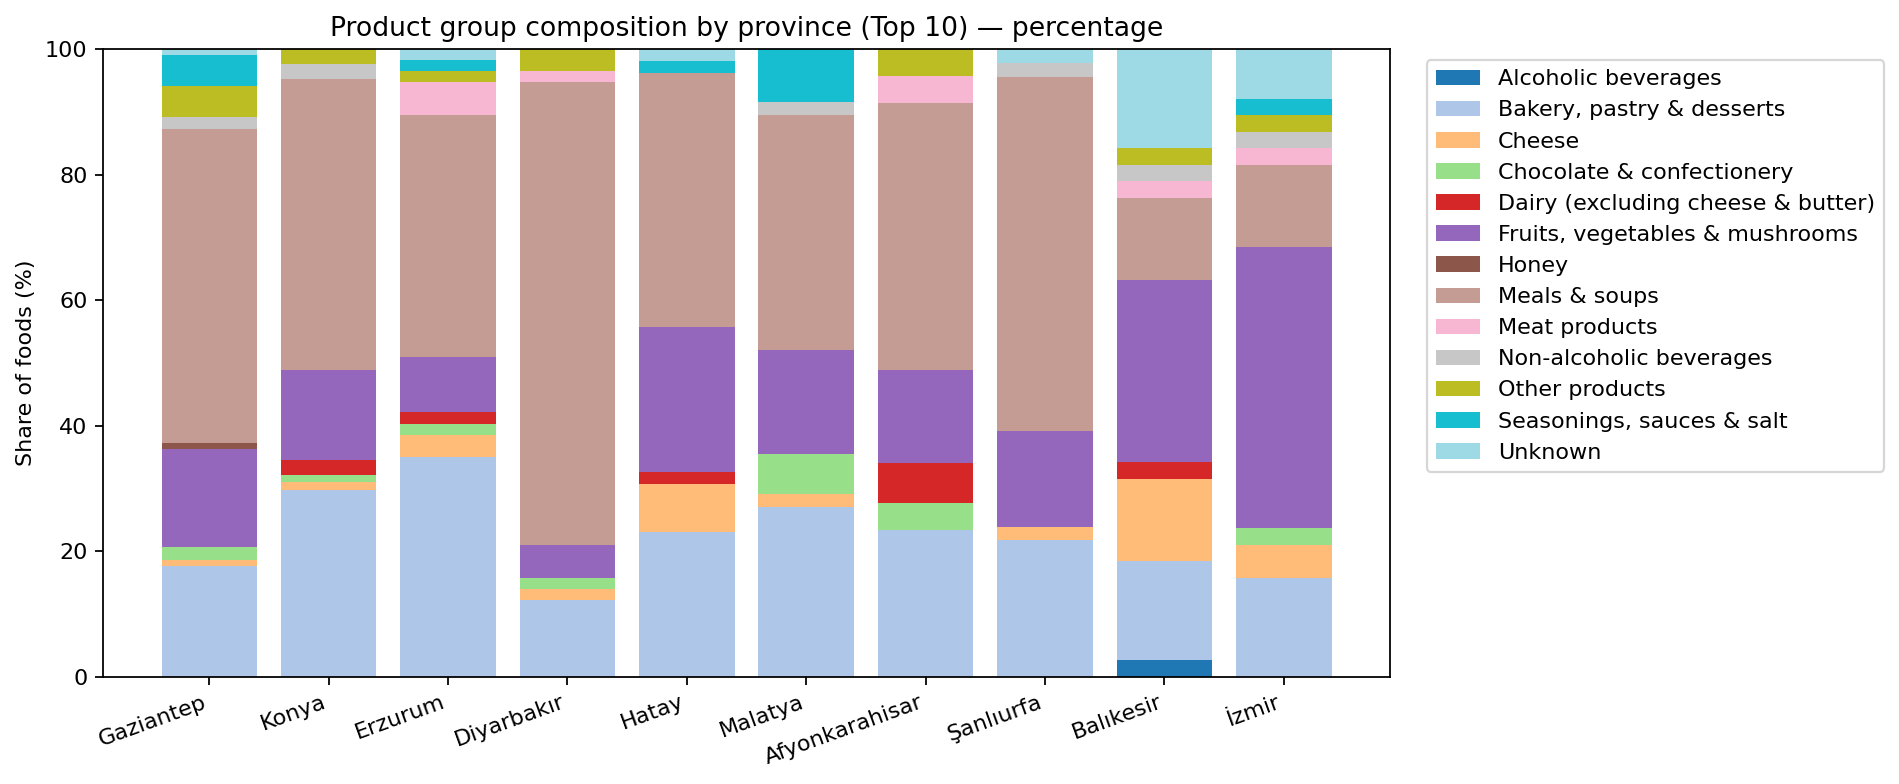

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

top_prov = foods["province"].value_counts().head(10).index.tolist()
sub = foods[foods["province"].isin(top_prov)].copy()

pivot = (sub.pivot_table(index="province",
                         columns="product_group_en",
                         values="food_name",
                         aggfunc="count",
                         fill_value=0))

pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

cats = list(pivot_pct.columns)
cmap = cm.get_cmap("tab20", len(cats))
colors = {cat: cmap(i) for i, cat in enumerate(cats)}

plt.figure(figsize=(12,5), dpi=160)

bottom = np.zeros(len(pivot_pct))
for col in cats:
    vals = pivot_pct[col].values
    plt.bar(pivot_pct.index, vals, bottom=bottom, label=col, color=colors[col])
    bottom += vals

plt.title("Product group composition by province (Top 10) — percentage")
plt.ylabel("Share of foods (%)")
plt.xticks(rotation=20, ha="right")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3210124269.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_groups, showfliers=False, vert=False)  # <-- horizontal


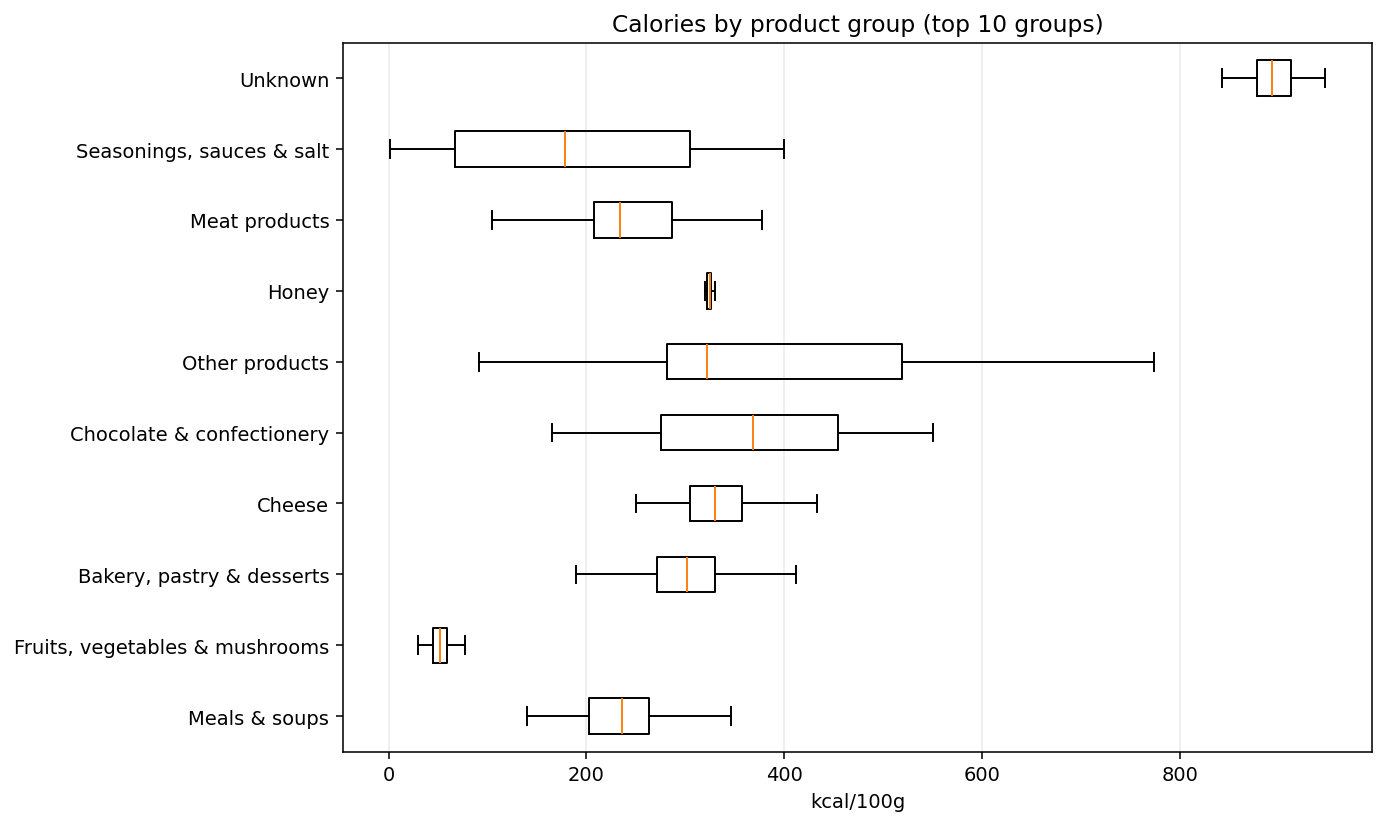

In [22]:
import matplotlib.pyplot as plt

top_groups = foods["product_group_en"].value_counts().head(10).index.tolist()
data = [foods.loc[foods["product_group_en"]==g, "kcal_100g"].dropna().values for g in top_groups]

plt.figure(figsize=(10,6), dpi=140)
plt.boxplot(data, labels=top_groups, showfliers=False, vert=False)  # <-- horizontal
plt.title("Calories by product group (top 10 groups)")
plt.xlabel("kcal/100g")
plt.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3538923836.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=short, showfliers=False)


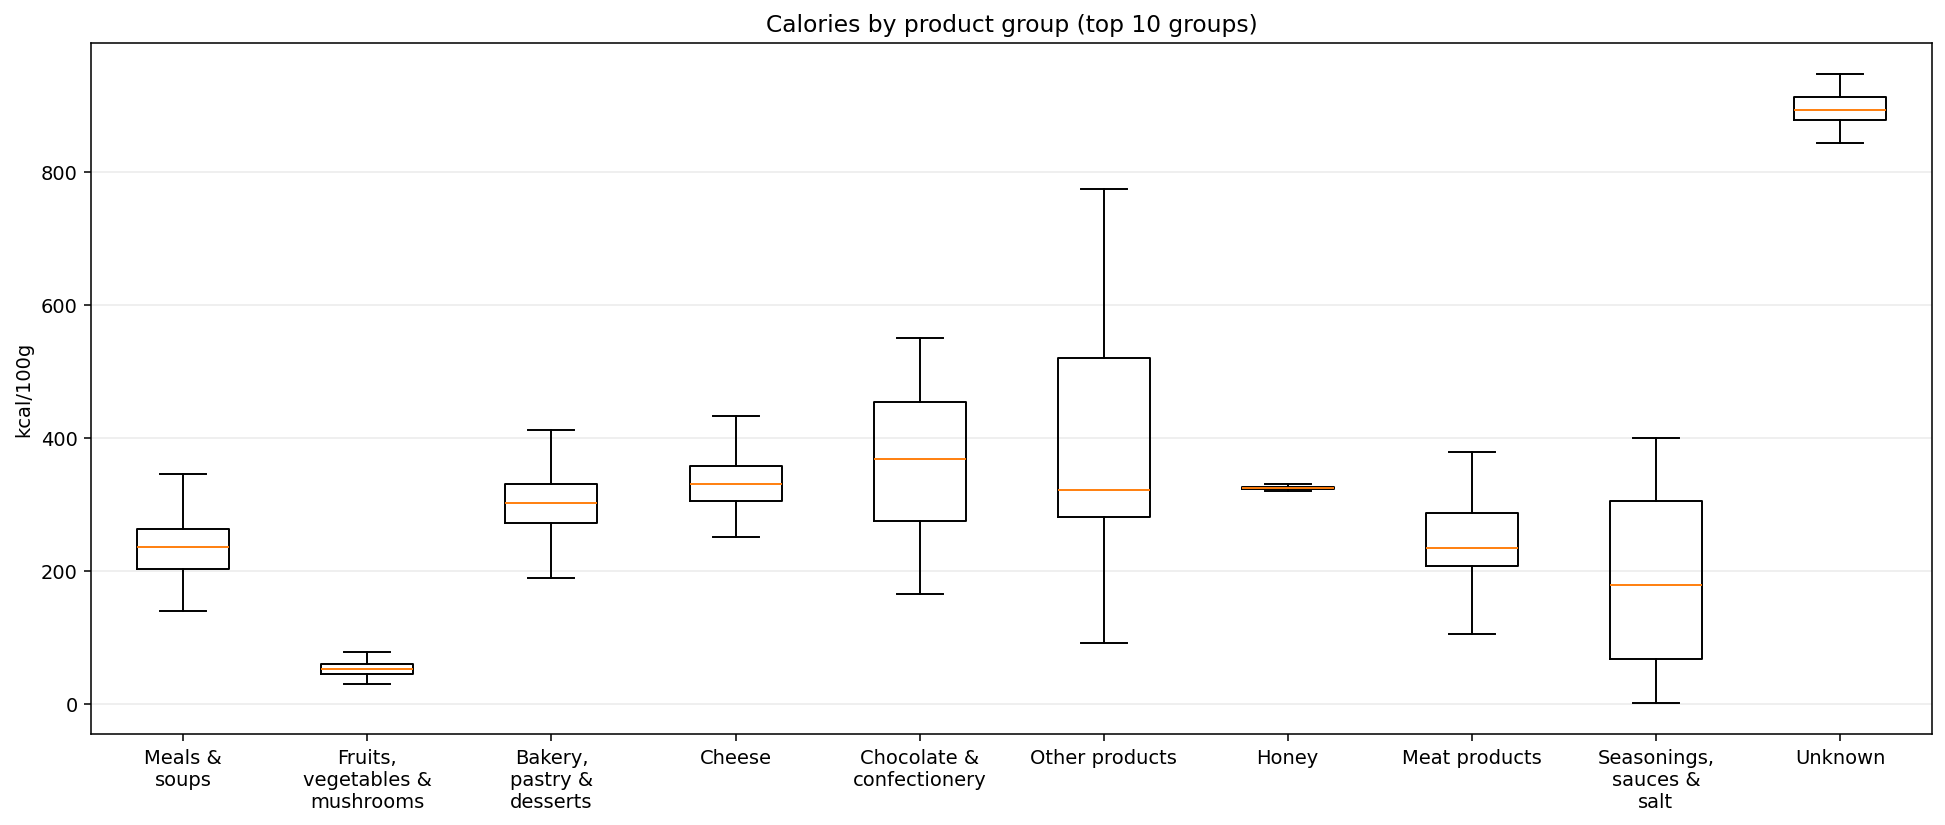

In [23]:
import matplotlib.pyplot as plt

top_groups = foods["product_group_en"].value_counts().head(10).index.tolist()
short = [g.replace(" & ", " &\n").replace(", ", ",\n") for g in top_groups]  # multi-line labels
data = [foods.loc[foods["product_group_en"]==g, "kcal_100g"].dropna().values for g in top_groups]

plt.figure(figsize=(14,6), dpi=140)
plt.boxplot(data, labels=short, showfliers=False)
plt.title("Calories by product group (top 10 groups)")
plt.ylabel("kcal/100g")
plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.show()


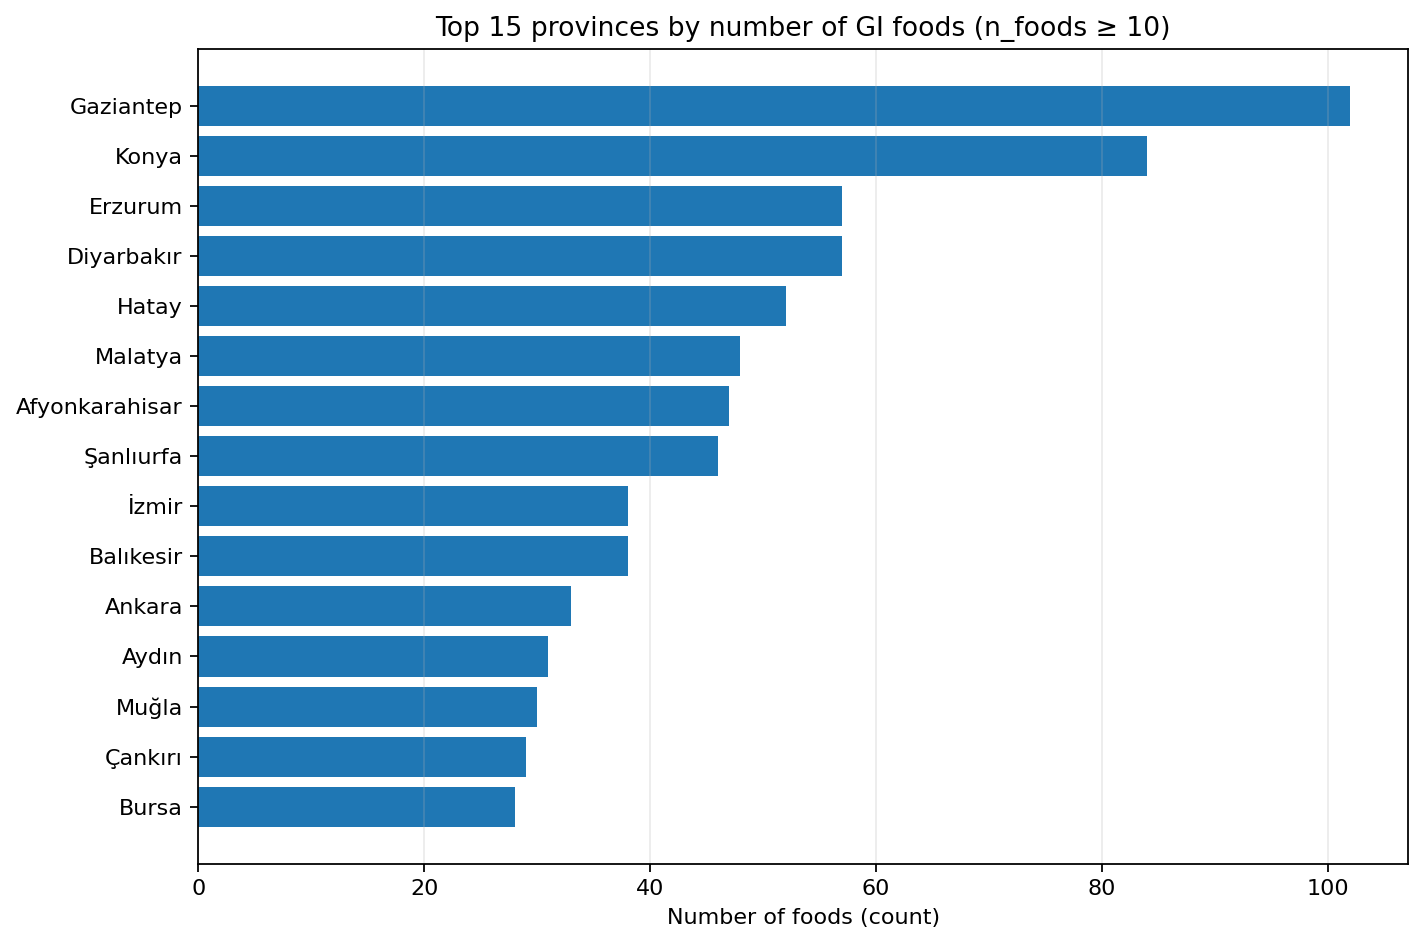

In [26]:
import matplotlib.pyplot as plt

min_n = 10
df = foods_prov[foods_prov["n_foods"] >= min_n].copy()

top_n = (df.sort_values("n_foods", ascending=False)
         .head(15)
         .sort_values("n_foods"))

plt.figure(figsize=(9,6), dpi=160)
plt.barh(top_n["province"], top_n["n_foods"])
plt.title(f"Top 15 provinces by number of GI foods (n_foods ≥ {min_n})")
plt.xlabel("Number of foods (count)")
plt.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()


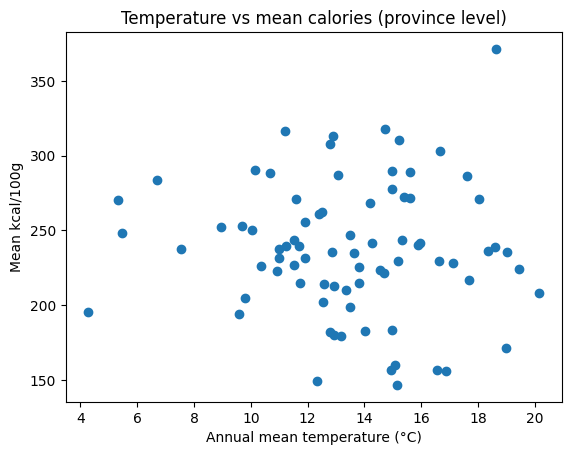

In [27]:
plt.figure()
plt.scatter(merged["temp_annual_mean"], merged["mean_kcal"])
plt.title("Temperature vs mean calories (province level)")
plt.xlabel("Annual mean temperature (°C)")
plt.ylabel("Mean kcal/100g")
plt.show()


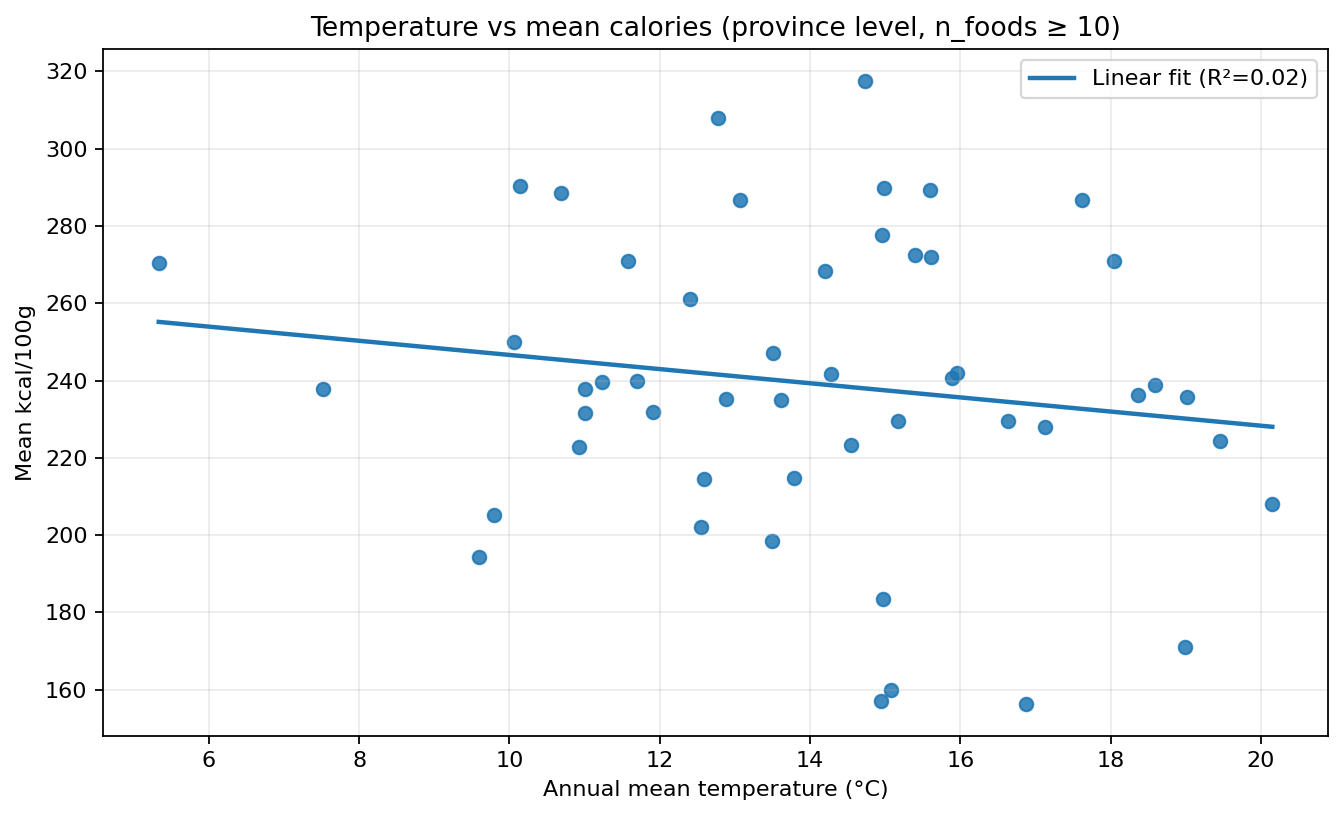

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# filter small-sample provinces (recommended)
min_n = 10
df = merged[merged["n_foods"] >= min_n].copy()

x = df["temp_annual_mean"].values
y = df["mean_kcal"].values

# linear fit: y = a*x + b
a, b = np.polyfit(x, y, 1)
y_hat = a*x + b

# R^2
ss_res = np.sum((y - y_hat)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res/ss_tot if ss_tot != 0 else np.nan

plt.figure(figsize=(8.5,5.2), dpi=160)
plt.scatter(x, y, alpha=0.85)
plt.plot(np.sort(x), a*np.sort(x) + b, linewidth=2, label=f"Linear fit (R²={r2:.2f})")

plt.title(f"Temperature vs mean calories (province level, n_foods ≥ {min_n})")
plt.xlabel("Annual mean temperature (°C)")
plt.ylabel("Mean kcal/100g")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


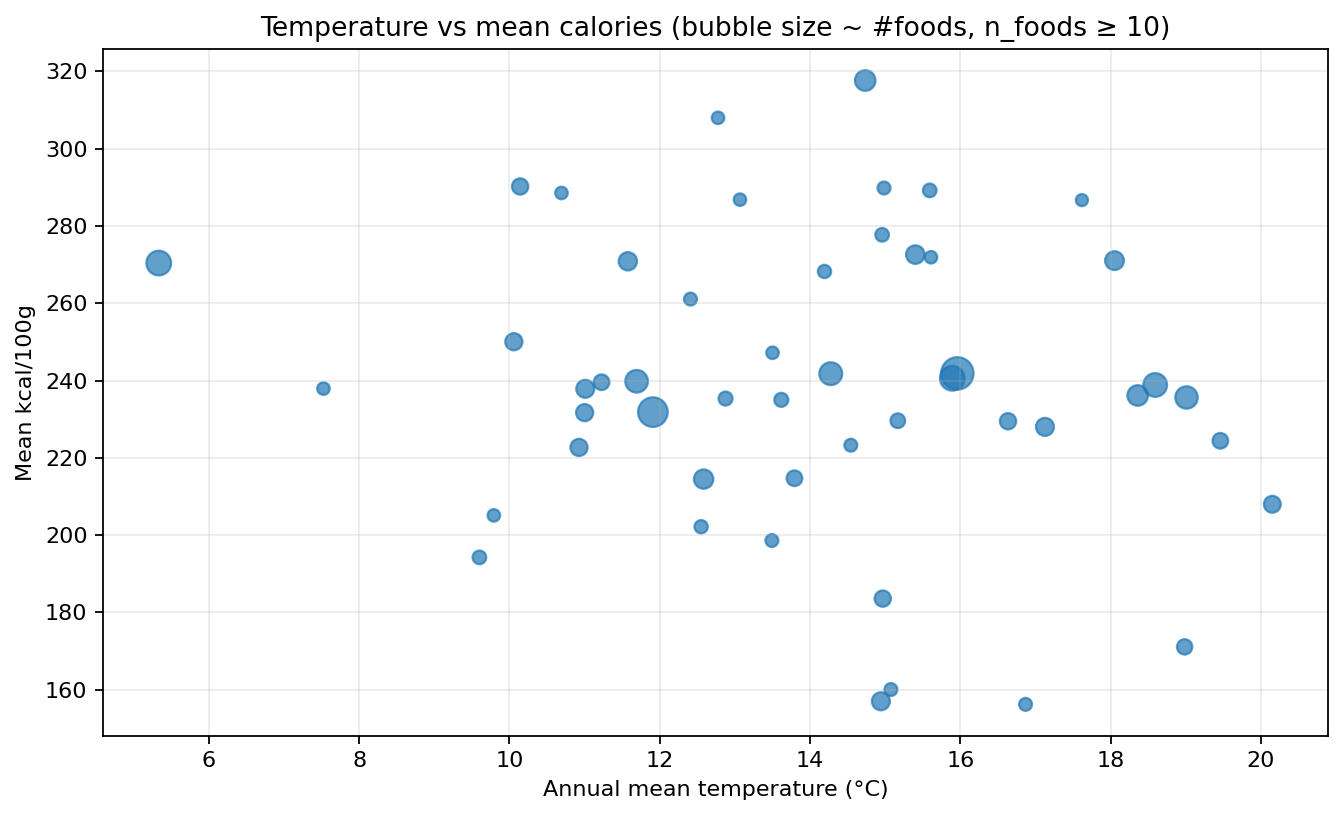

In [29]:
import numpy as np
import matplotlib.pyplot as plt

min_n = 10
df = merged[merged["n_foods"] >= min_n].copy()

x = df["temp_annual_mean"].values
y = df["mean_kcal"].values
sizes = df["n_foods"].values

plt.figure(figsize=(8.5,5.2), dpi=160)
plt.scatter(x, y, s=10 + 2*sizes, alpha=0.7)  # bigger province = more foods
plt.title(f"Temperature vs mean calories (bubble size ~ #foods, n_foods ≥ {min_n})")
plt.xlabel("Annual mean temperature (°C)")
plt.ylabel("Mean kcal/100g")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


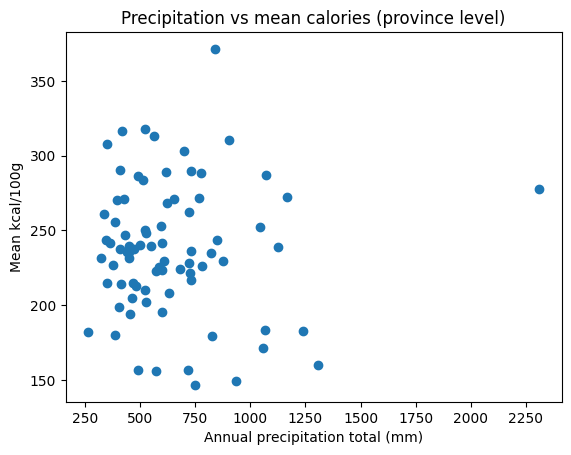

In [30]:
plt.figure()
plt.scatter(merged["prec_annual_total"], merged["mean_kcal"])
plt.title("Precipitation vs mean calories (province level)")
plt.xlabel("Annual precipitation total (mm)")
plt.ylabel("Mean kcal/100g")
plt.show()


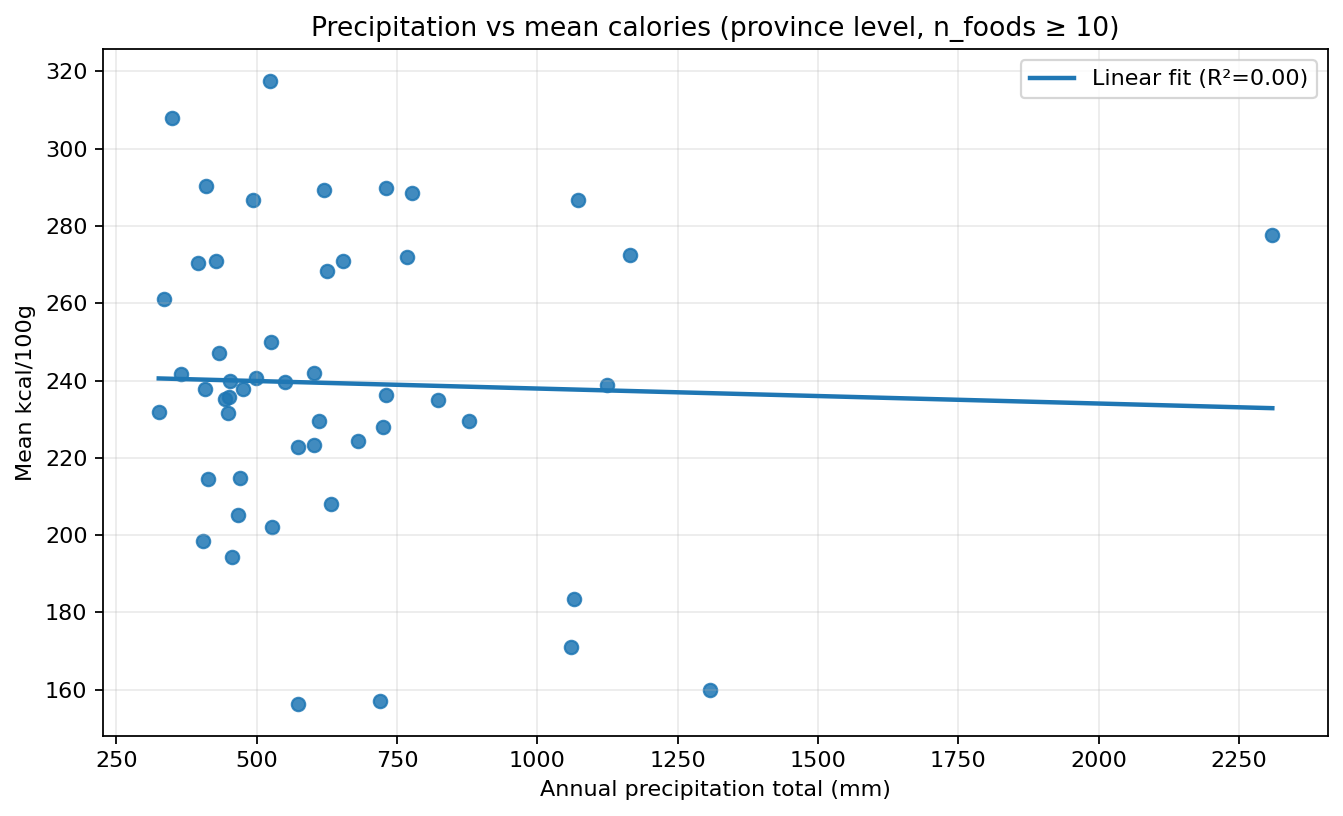

In [31]:
import numpy as np
import matplotlib.pyplot as plt

min_n = 10
df = merged[merged["n_foods"] >= min_n].copy()

x = df["prec_annual_total"].values
y = df["mean_kcal"].values

# linear fit
a, b = np.polyfit(x, y, 1)
y_hat = a*x + b

# R^2
ss_res = np.sum((y - y_hat)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res/ss_tot if ss_tot != 0 else np.nan

plt.figure(figsize=(8.5,5.2), dpi=160)
plt.scatter(x, y, alpha=0.85)
plt.plot(np.sort(x), a*np.sort(x) + b, linewidth=2, label=f"Linear fit (R²={r2:.2f})")

plt.title(f"Precipitation vs mean calories (province level, n_foods ≥ {min_n})")
plt.xlabel("Annual precipitation total (mm)")
plt.ylabel("Mean kcal/100g")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


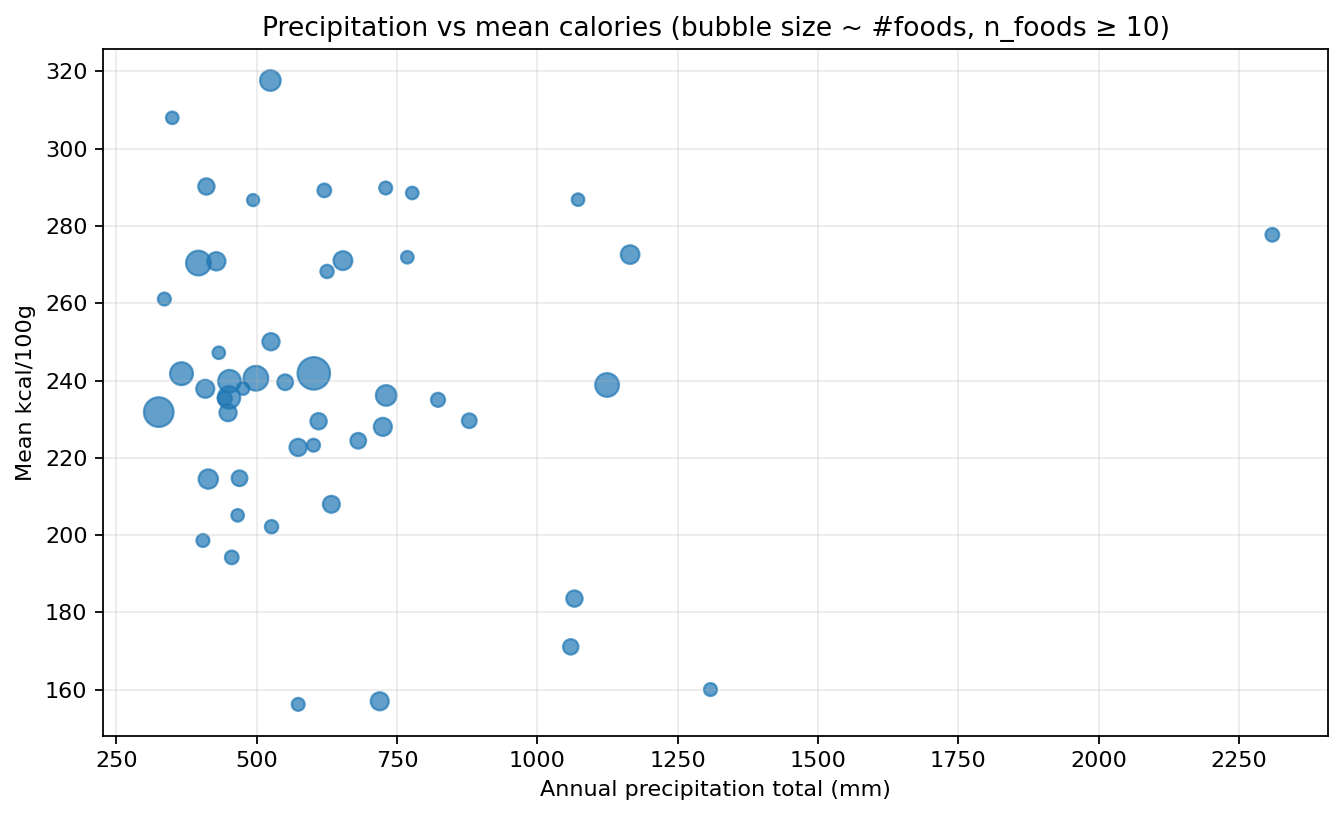

In [32]:
import matplotlib.pyplot as plt

min_n = 10
df = merged[merged["n_foods"] >= min_n].copy()

plt.figure(figsize=(8.5,5.2), dpi=160)
plt.scatter(df["prec_annual_total"], df["mean_kcal"], s=10 + 2*df["n_foods"], alpha=0.7)
plt.title(f"Precipitation vs mean calories (bubble size ~ #foods, n_foods ≥ {min_n})")
plt.xlabel("Annual precipitation total (mm)")
plt.ylabel("Mean kcal/100g")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


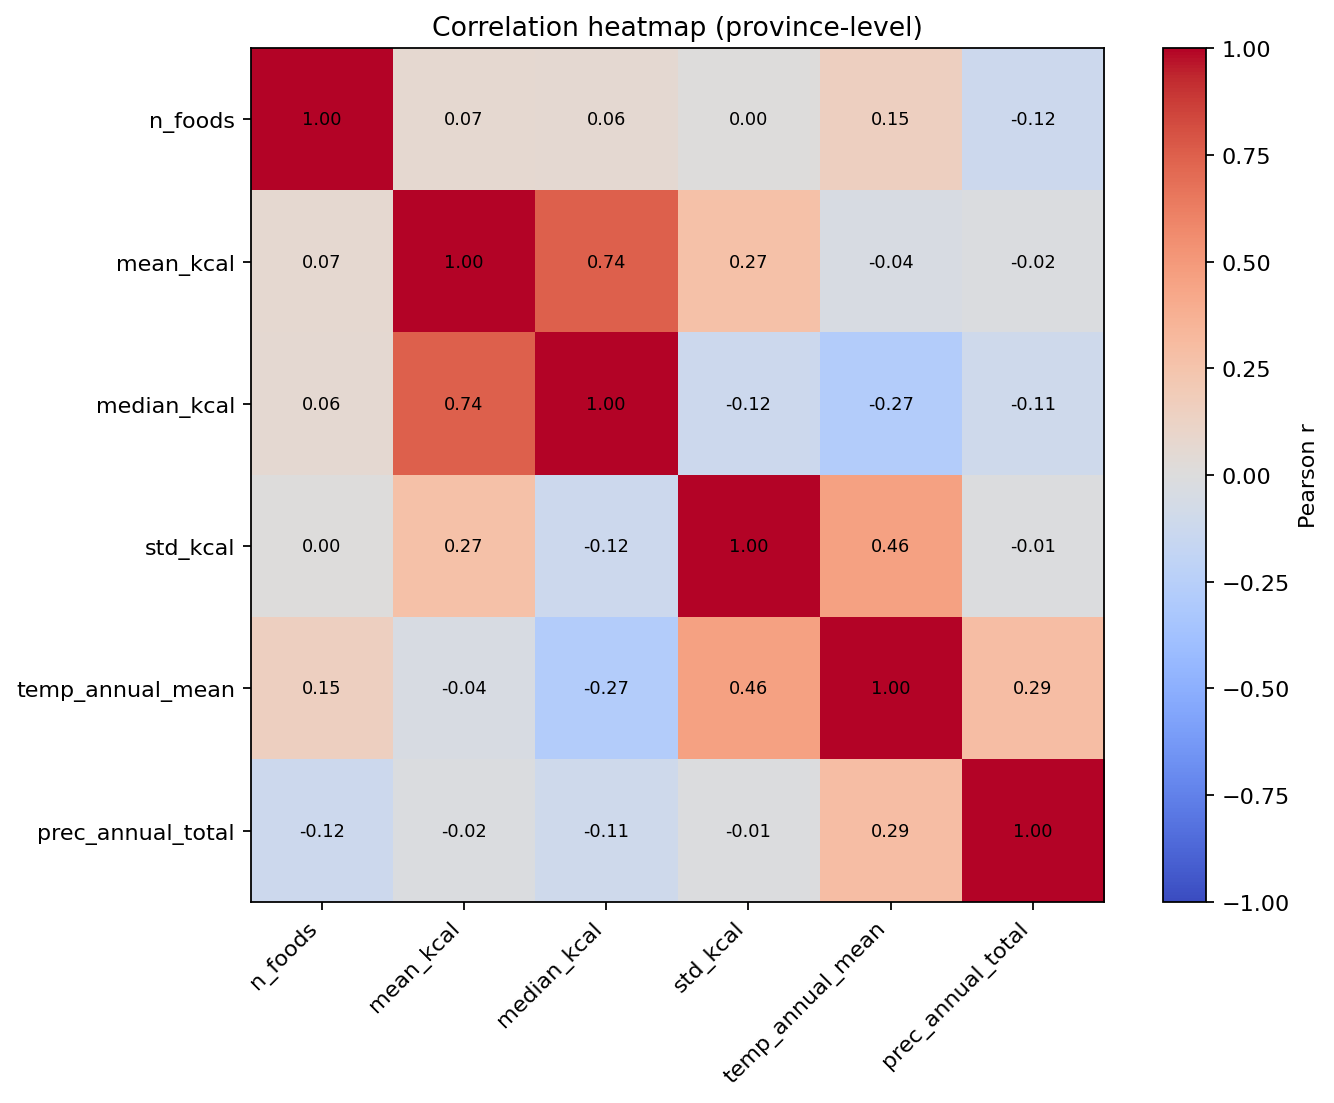

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ more variables (add these if columns exist)
extra_cols = []
for c in ["max_kcal", "min_kcal", "q1_kcal", "q3_kcal", "iqr_kcal", "cv_kcal"]:
    if c in merged.columns:
        extra_cols.append(c)

num_cols = ["n_foods","mean_kcal","median_kcal","std_kcal","temp_annual_mean","prec_annual_total"] + extra_cols

corr = merged[num_cols].corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(9,7), dpi=160)
im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")  # ✅ warm palette

# ticks
ax.set_xticks(np.arange(len(num_cols)))
ax.set_yticks(np.arange(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45, ha="right")
ax.set_yticklabels(num_cols)

ax.set_title("Correlation heatmap (province-level)")

# ✅ write values inside cells
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        val = corr.values[i, j]
        ax.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8)

# colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Pearson r")

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import re

FOODS_PATH = "manual_clean_en.csv"
CLIM_PATH  = "iklim_mgm_1991_2020.csv"

def normalize_province(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().upper()
    tr_map = str.maketrans({
        "İ":"I","I":"I","ı":"I",
        "Ş":"S","Ğ":"G","Ü":"U","Ö":"O","Ç":"C",
        "Â":"A","Ê":"E","Û":"U"
    })
    s = s.translate(tr_map)
    s = re.sub(r"[^A-Z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s.replace(" ", "")

# 1) Load
foods = pd.read_csv(FOODS_PATH, encoding="utf-8-sig")
clim  = pd.read_csv(CLIM_PATH, encoding="utf-8-sig")

# 2) Ensure numeric
foods["kcal_100g"] = pd.to_numeric(foods["kcal_100g"], errors="coerce")
clim["temp_annual_mean"] = pd.to_numeric(clim["temp_annual_mean"], errors="coerce")
clim["prec_annual_total"] = pd.to_numeric(clim["prec_annual_total"], errors="coerce")

# 3) Keys for matching
foods["prov_key"] = foods["province"].apply(normalize_province)
clim["prov_key"]  = clim["province"].apply(normalize_province)

print("Foods rows:", len(foods), "| unique provinces:", foods["prov_key"].nunique())
print("Climate rows:", len(clim),  "| unique provinces:", clim["prov_key"].nunique())

# 4) Province-level aggregation
foods_prov = (foods.groupby(["prov_key","province"], dropna=False)
              .agg(n_foods=("food_name","size"),
                   mean_kcal=("kcal_100g","mean"),
                   median_kcal=("kcal_100g","median"),
                   std_kcal=("kcal_100g","std"))
              .reset_index())

# 5) Merge
merged = foods_prov.merge(
    clim[["prov_key","temp_annual_mean","prec_annual_total"]],
    on="prov_key",
    how="inner"
)

print("✅ Merged provinces:", merged.shape[0])
display(merged.head(5))


Foods rows: 1530 | unique provinces: 83
Climate rows: 79 | unique provinces: 79
✅ Merged provinces: 79


,prov_key,province,n_foods,mean_kcal,median_kcal,std_kcal,temp_annual_mean,prec_annual_total
0,ADANA,Adana,20,224.400000,227.5,212.563402,19.458333,680.8
1,ADIYAMAN,Adıyaman,7,216.857143,171.0,207.880117,17.683333,729.5
2,AFYONKARAHISAR,Afyonkarahisar,47,239.808511,241.0,122.455429,11.691667,451.4
3,AGRI,Ağrı,6,283.500000,276.5,61.282134,6.691667,512.9
4,AKSARAY,Aksaray,11,308.000000,277.0,139.529208,12.775000,349.4


In [3]:
import numpy as np

# rebuild foods_prov with more stats
foods_prov = (foods.groupby(["prov_key","province"], dropna=False)
              .agg(n_foods=("food_name","size"),
                   mean_kcal=("kcal_100g","mean"),
                   median_kcal=("kcal_100g","median"),
                   std_kcal=("kcal_100g","std"),
                   min_kcal=("kcal_100g","min"),
                   max_kcal=("kcal_100g","max"),
                   q1_kcal=("kcal_100g", lambda x: x.quantile(0.25)),
                   q3_kcal=("kcal_100g", lambda x: x.quantile(0.75)))
              .reset_index())

foods_prov["iqr_kcal"] = foods_prov["q3_kcal"] - foods_prov["q1_kcal"]
foods_prov["cv_kcal"]  = foods_prov["std_kcal"] / foods_prov["mean_kcal"]

# merge again
merged = foods_prov.merge(
    clim[["prov_key","temp_annual_mean","prec_annual_total"]],
    on="prov_key",
    how="inner"
)

print("Merged provinces:", merged.shape[0])
display(merged.head(3))


Merged provinces: 79


,prov_key,province,n_foods,mean_kcal,median_kcal,std_kcal,min_kcal,max_kcal,q1_kcal,q3_kcal,iqr_kcal,cv_kcal,temp_annual_mean,prec_annual_total
0,ADANA,Adana,20,224.400000,227.5,212.563402,22,886,56.25,296.5,240.25,0.947252,19.458333,680.8
1,ADIYAMAN,Adıyaman,7,216.857143,171.0,207.880117,42,612,48.00,298.5,250.50,0.958604,17.683333,729.5
2,AFYONKARAHISAR,Afyonkarahisar,47,239.808511,241.0,122.455429,42,540,163.00,305.5,142.50,0.510638,11.691667,451.4


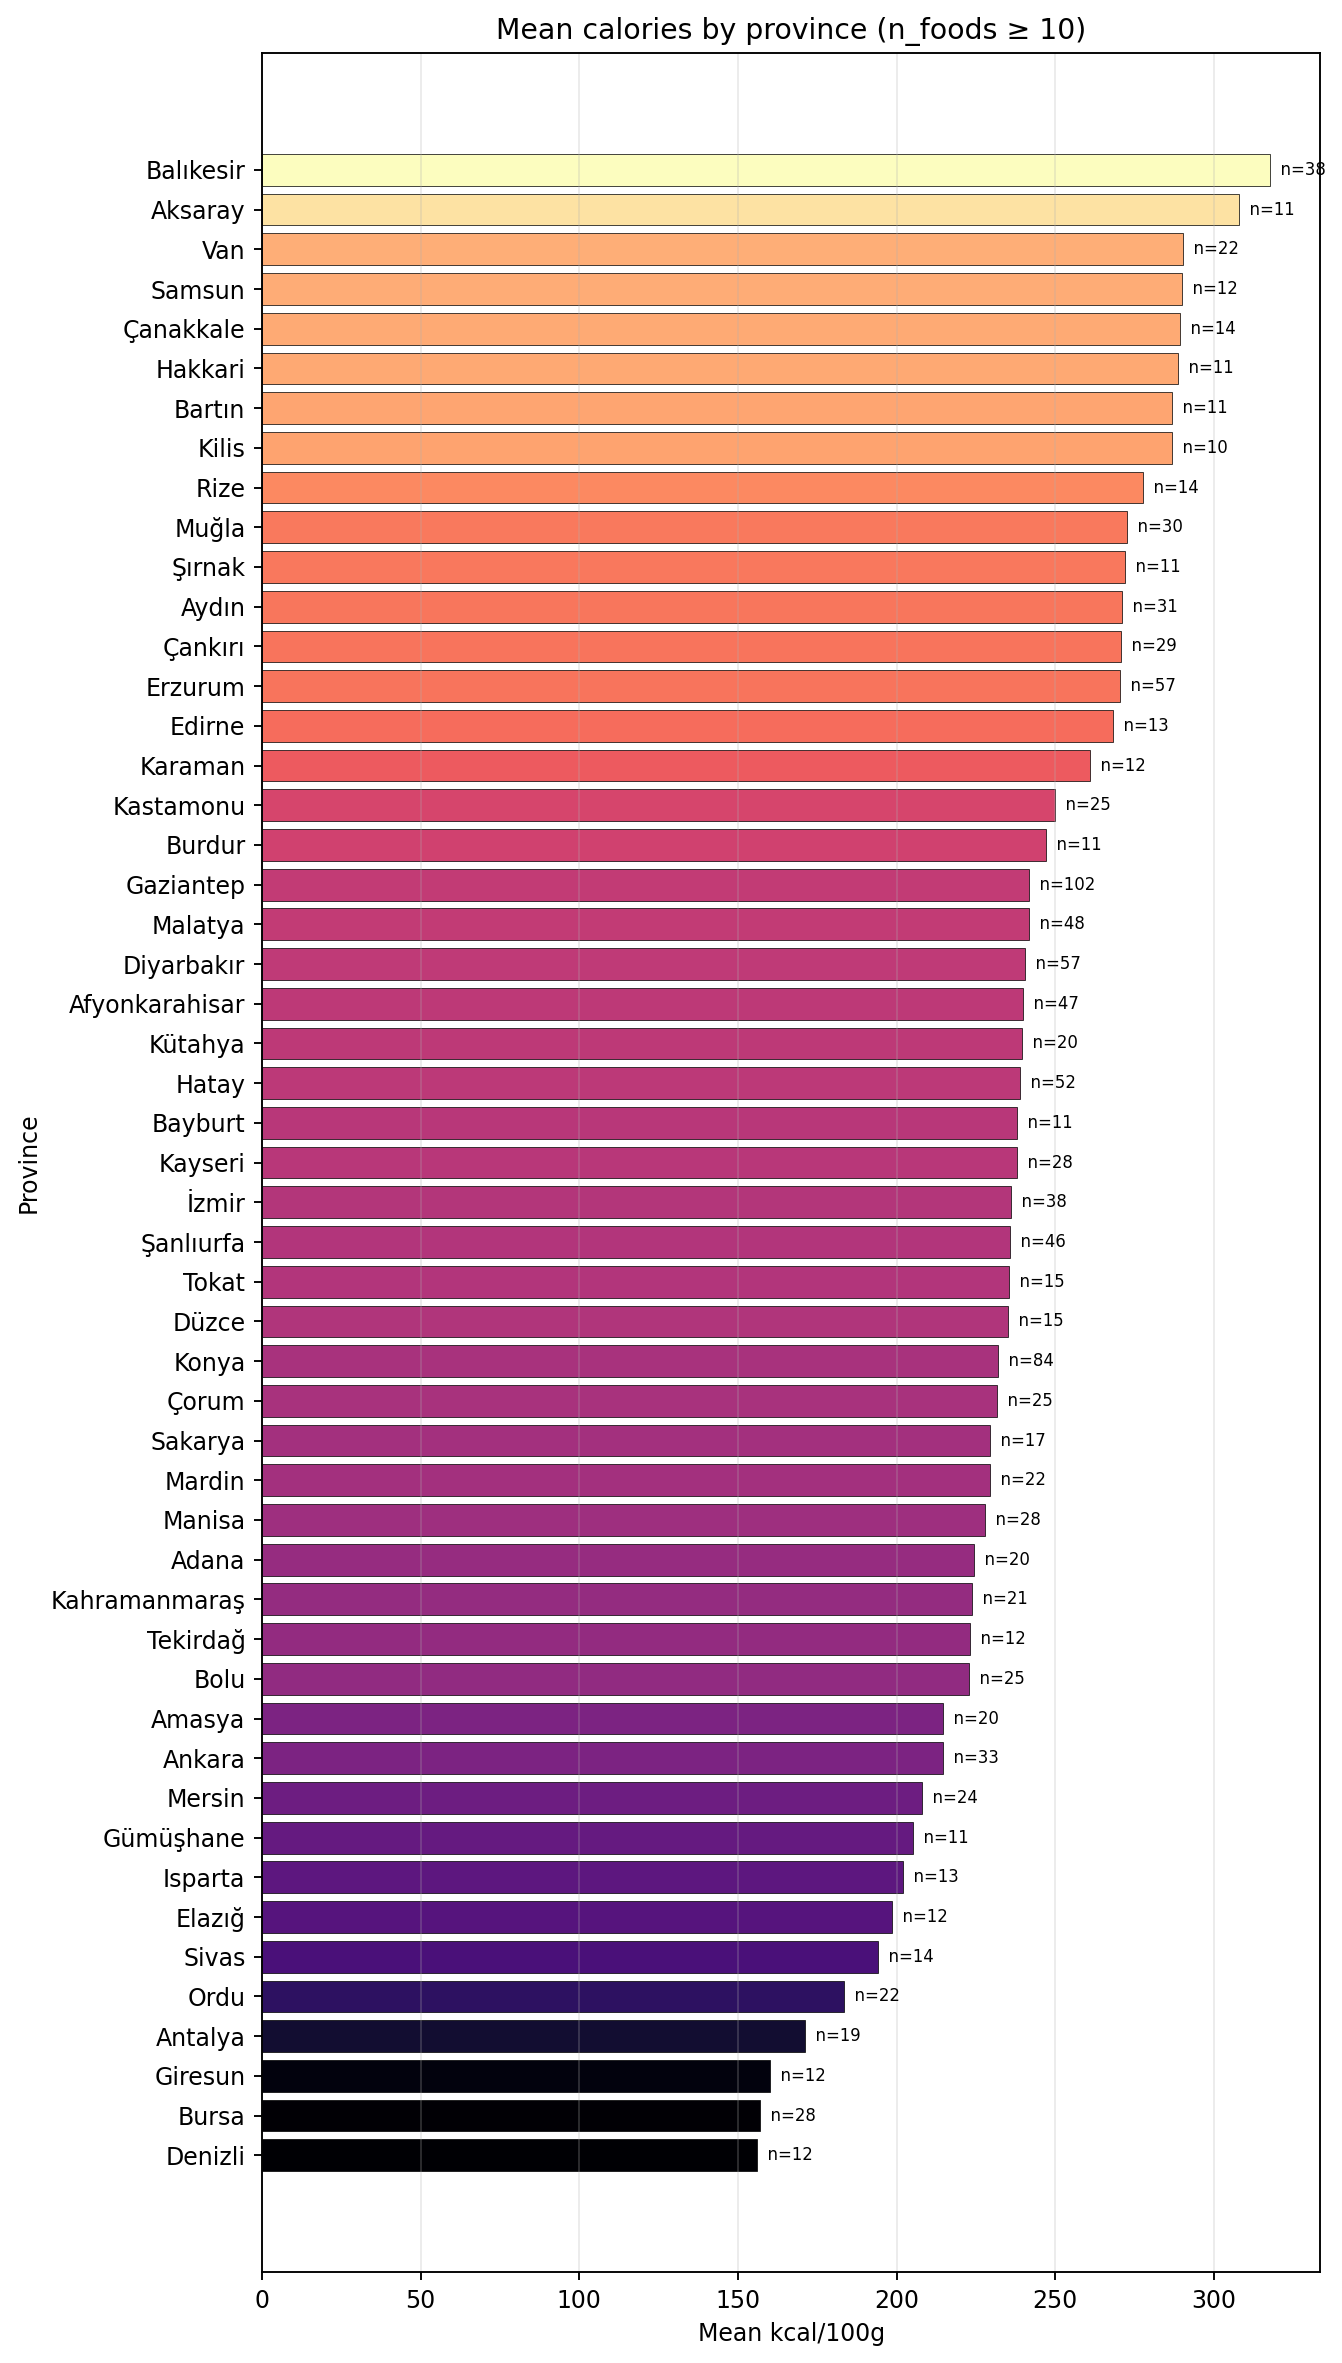

Provinces plotted: 51
Mean kcal range: 156.17 - 317.66


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# If foods_prov doesn't exist, build it from foods
# foods should have: province, food_name, kcal_100g
# -------------------------
if "foods_prov" not in globals():
    foods_prov = (foods.groupby("province", dropna=False)
                  .agg(n_foods=("food_name","size"),
                       mean_kcal=("kcal_100g","mean"))
                  .reset_index())

# -------------------------
# PARAMETERS
# -------------------------
min_n = 10        # filter provinces with too few foods (set 0 to disable)
top_k = None      # set e.g. 40 to show only top/bottom; keep None to show all

dfp = foods_prov.copy()
dfp = dfp.dropna(subset=["province","mean_kcal"])

if min_n and min_n > 0:
    dfp = dfp[dfp["n_foods"] >= min_n]

# sort low -> high for nice barh
dfp = dfp.sort_values("mean_kcal", ascending=True)

# optionally keep only last top_k (highest mean_kcal)
if top_k is not None:
    dfp = dfp.tail(top_k)

# -------------------------
# COLOR SCALE (warm colormap)
# -------------------------
vals = dfp["mean_kcal"].values
norm = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9)
colors = plt.cm.magma(norm)   # warm palette: magma / inferno / plasma

# -------------------------
# PLOT
# -------------------------
plt.figure(figsize=(8, 14), dpi=170)
plt.barh(dfp["province"], dfp["mean_kcal"], color=colors, edgecolor="black", linewidth=0.3)

plt.title(f"Mean calories by province (n_foods ≥ {min_n})" if min_n > 0 else "Mean calories by province")
plt.xlabel("Mean kcal/100g")
plt.ylabel("Province")
plt.grid(axis="x", alpha=0.25)

# annotate n_foods
for i, (v, n) in enumerate(zip(dfp["mean_kcal"].values, dfp["n_foods"].values)):
    plt.text(v, i, f"  n={int(n)}", va="center", fontsize=7)

plt.tight_layout()
plt.show()

print("Provinces plotted:", len(dfp))
print("Mean kcal range:", round(dfp["mean_kcal"].min(),2), "-", round(dfp["mean_kcal"].max(),2))
